In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import brownian_motion

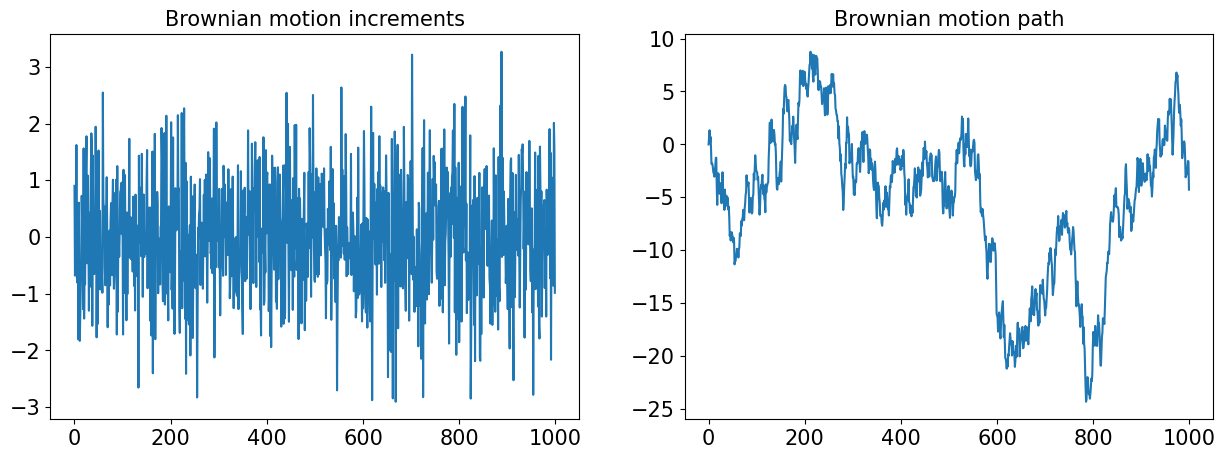

In [12]:
dW = brownian_motion.get_dW(N=1_000)
W = brownian_motion.get_W(N=1_000)

fig = plt.figure(figsize=(15, 5))

title = "Brownian motion increments"
plt.subplot(1, 2, 1)
plt.plot(dW)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

title = "Brownian motion path"
plt.subplot(1, 2, 2)
plt.plot(W)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

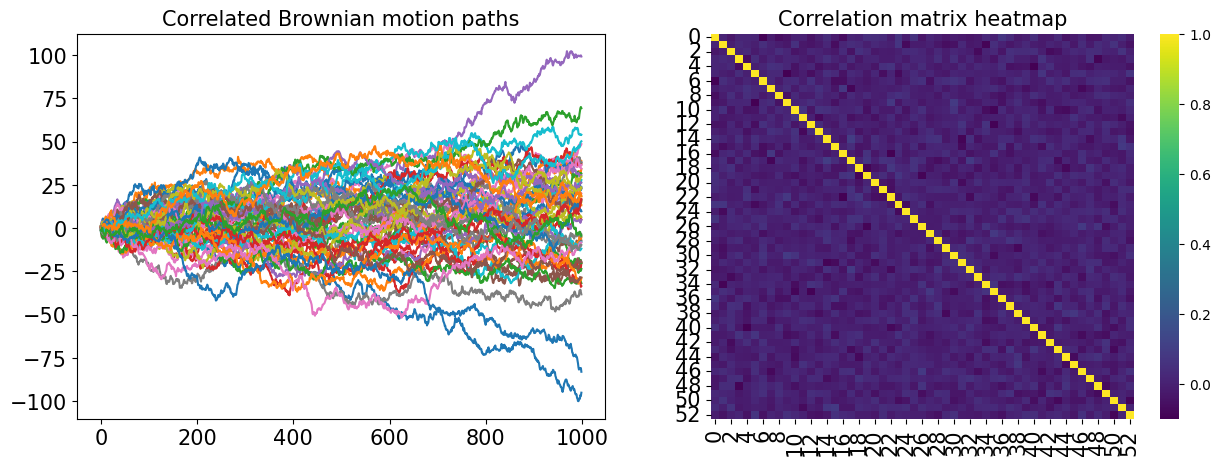

In [90]:
N = 1_000
M = 53
rho = 0

corr_dWs = brownian_motion.get_corr_dW_matrix(N, M, rho)

fig = plt.figure(figsize=(15, 5))

# paths
title = "Correlated Brownian motion paths"
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(corr_dWs, axis=0))
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# correlation
title = "Correlation matrix heatmap"
plt.subplot(1, 2, 2)
sns.heatmap(np.corrcoef(corr_dWs, rowvar=False), cmap="viridis")
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [14]:
import OU_proc

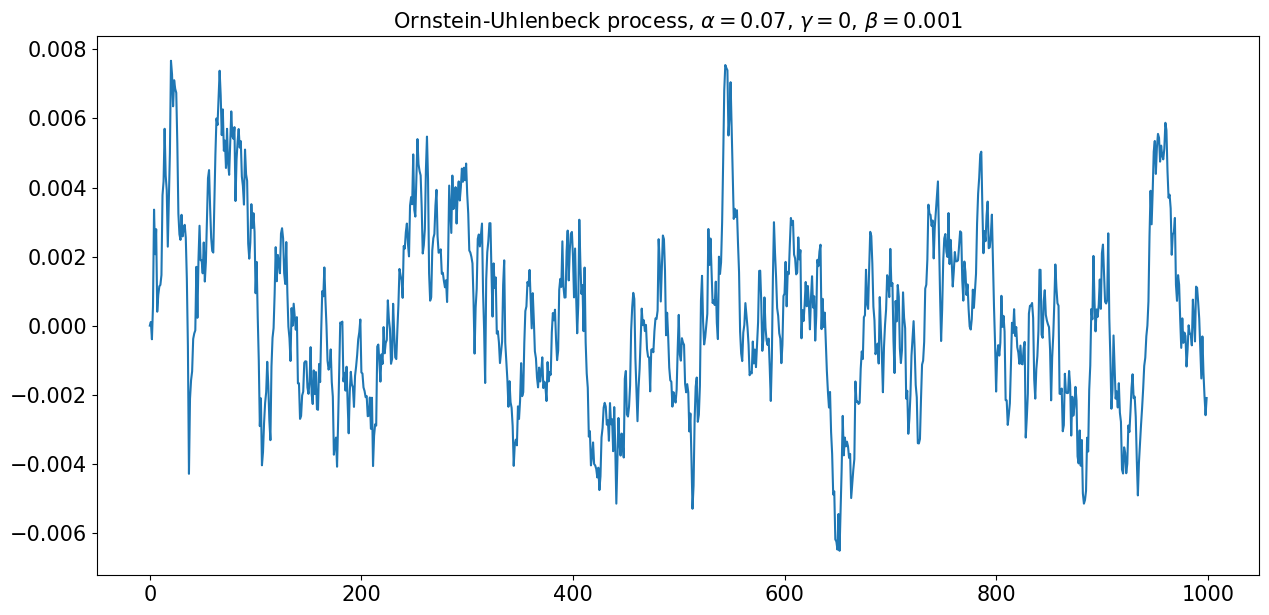

In [10]:
OU_params = OU_proc.OUParams(alpha=0.07, gamma=0.0, beta=0.001)
OU_process = OU_proc.get_OU_process(1_000, OU_params)

fig = plt.figure(figsize=(15, 7))

title = "Ornstein-Uhlenbeck process, "
title += r"$\alpha=0.07$, $\gamma = 0$, $\beta = 0.001$"
plt.plot(OU_process)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [17]:
# generate process with random_state to reproduce results
OU_parameters = OU_proc.OUParams(alpha=0.07, gamma=0.0, beta=0.001)
OU_process = OU_proc.get_OU_process(10_000, OU_parameters, random_state=7)

OU_params_hat = OU_proc.estimate_OU_params(OU_process)
OU_params_hat

OUParams(alpha=0.06690302110118503, gamma=-0.00012332521817391017, beta=0.0009251398213701725)

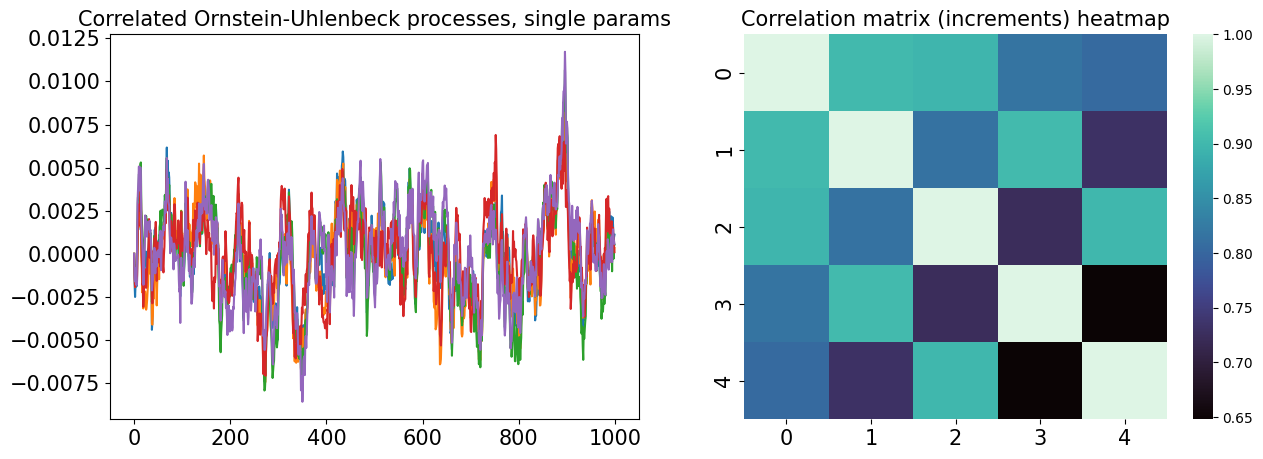

In [20]:
# case 1

N = 1_000
OU_parameters = OU_proc.OUParams(alpha=0.07, gamma=0.0, beta=0.001)
M = 5
rho = 0.9
OU_processes = OU_proc.get_corr_OU_procs(N, OU_parameters, M, rho)

fig = plt.figure(figsize=(15, 5))

title = "Correlated Ornstein-Uhlenbeck processes, single params"
plt.subplot(1, 2, 1)
plt.plot(OU_processes)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

title = "Correlation matrix (increments) heatmap"
plt.subplot(1, 2, 2)
sns.heatmap(np.corrcoef(np.diff(OU_processes, axis=0), rowvar=False), cmap="mako")
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

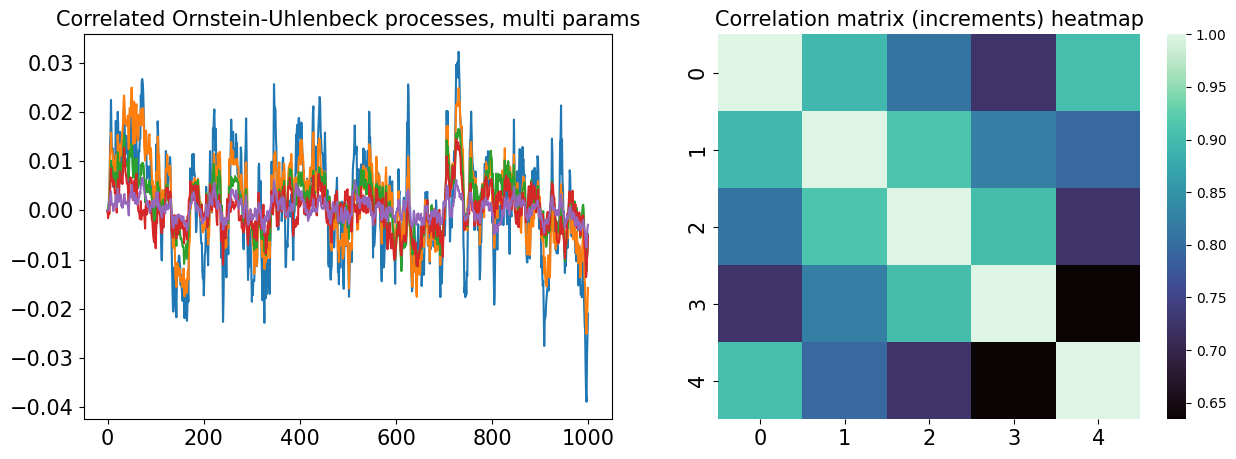

In [24]:
# case 2

N = 1_000
OU_parameters = (
    OU_proc.OUParams(alpha=0.07, gamma=0.0, beta=0.005),
    OU_proc.OUParams(alpha=0.05, gamma=0.0, beta=0.003),
    OU_proc.OUParams(alpha=0.06, gamma=0.0, beta=0.002),
    OU_proc.OUParams(alpha=0.09, gamma=0.0, beta=0.002),
    OU_proc.OUParams(alpha=0.08, gamma=0.0, beta=0.001),
)
rho = 0.9
OU_processes = OU_proc.get_corr_OU_procs(N, OU_parameters, M, rho)



fig = plt.figure(figsize=(15, 5))

title = "Correlated Ornstein-Uhlenbeck processes, multi params"
plt.subplot(1, 2, 1)
plt.plot(OU_processes)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

title = "Correlation matrix (increments) heatmap"
plt.subplot(1, 2, 2)
sns.heatmap(np.corrcoef(np.diff(OU_processes, axis=0), rowvar=False), cmap="mako")
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [25]:
import CIR_proc

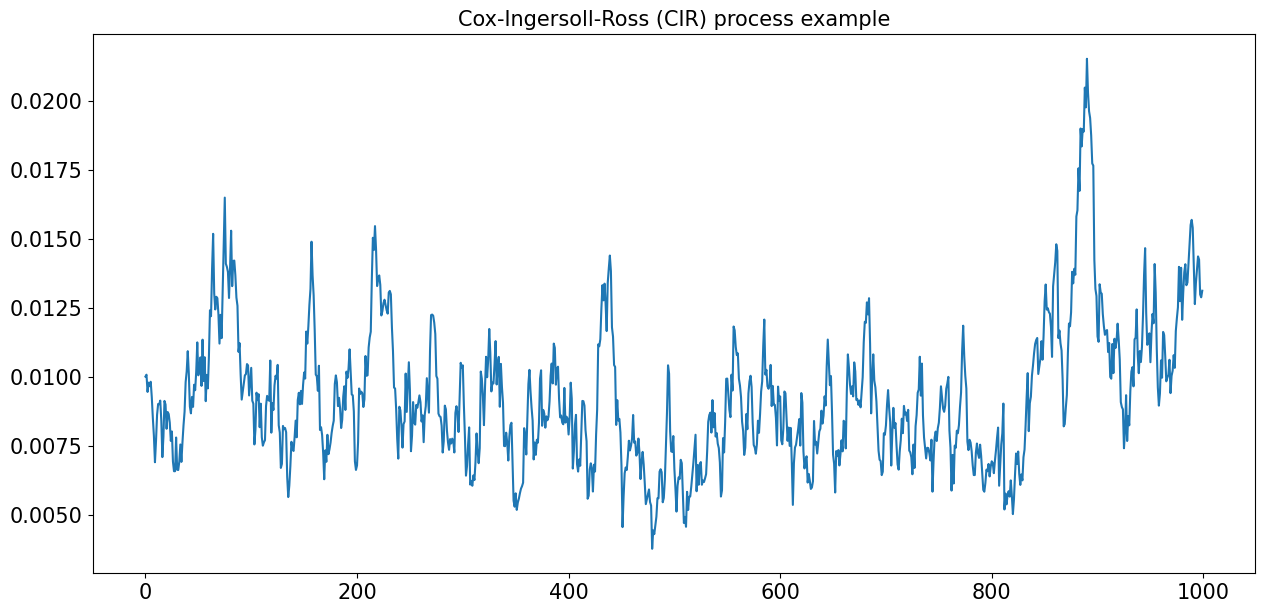

In [27]:
CIR_parameters = CIR_proc.CIRParams(a=0.06, b=0.01, c=0.009)
CIR_processes = CIR_proc.get_CIR_process(1_000, CIR_parameters)

#----------------------------------------------------
# plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))

title = "Cox-Ingersoll-Ross (CIR) process example"
plt.plot(CIR_processes)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [29]:
# generate process with random_state to reproduce results
CIR_parameters = CIR_proc.CIRParams(a=0.05, b=0.5, c=0.02)
CIR_processes = CIR_proc.get_CIR_process(1_000, CIR_parameters, random_state=3)

# estimate parameters
CIR_params_hat = CIR_proc.estimate_CIR_params(CIR_processes)
CIR_params_hat

CIRParams(a=0.05125324782019516, b=0.5043588622427937, c=0.02014670637207867)

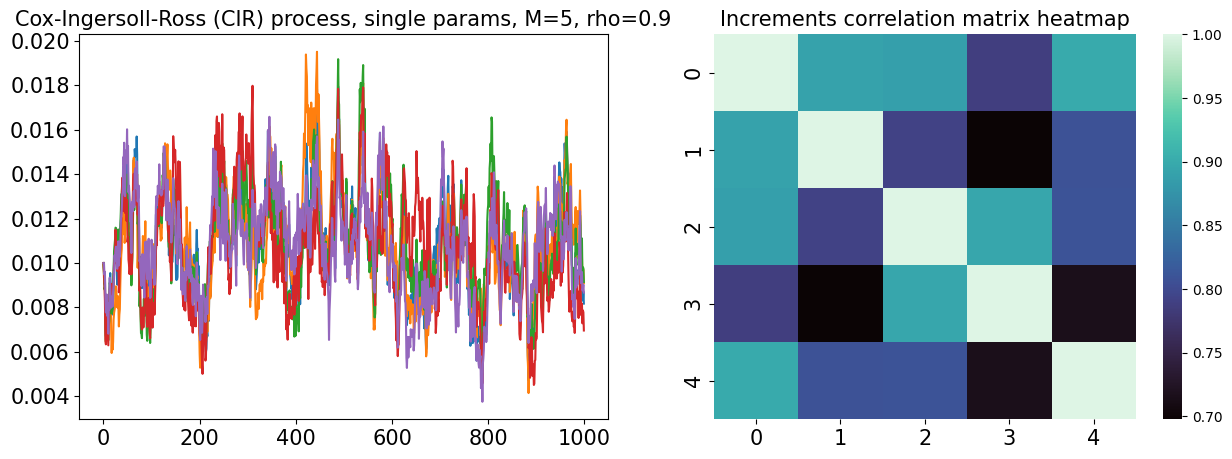

In [32]:
#----------------------------------------------------------------
# single params case

# define the parameters
N = 1_000
CIR_parameters = CIR_proc.CIRParams(a=0.06, b=0.01, c=0.009)
M = 5
rho = 0.9

CIR_processes = CIR_proc.get_corr_CIR_procs(N, CIR_parameters, M, rho)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
title = f"Cox-Ingersoll-Ross (CIR) process, single params, {M=}, {rho=}"
plt.plot(CIR_processes)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 2, 2)
title = f"Increments correlation matrix heatmap"
sns.heatmap(np.corrcoef(np.diff(CIR_processes, axis=0), rowvar=False), cmap="mako")
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

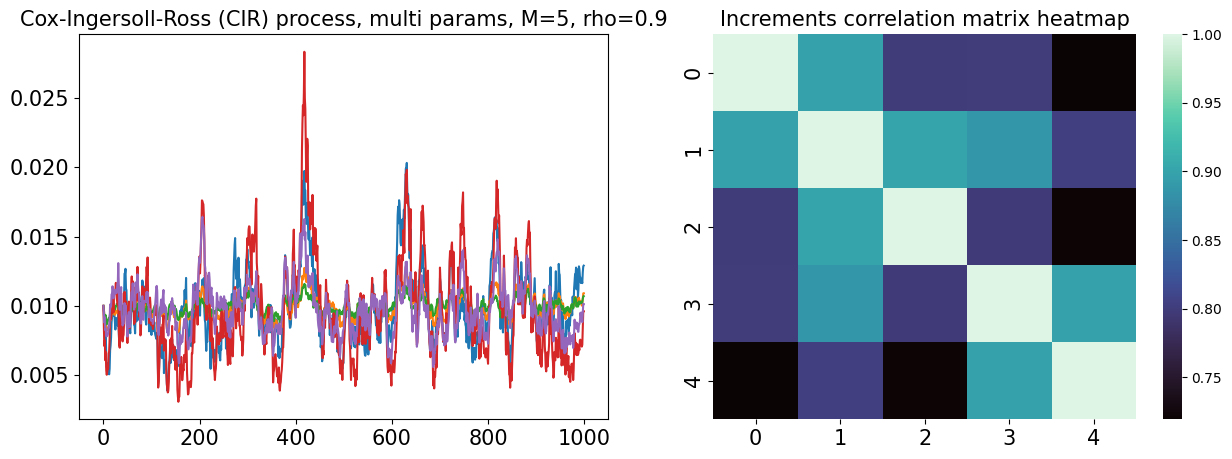

In [34]:
#----------------------------------------------------------------
# multi params case

# define the parameters
N = 1_000
CIR_parameters = (
    CIR_proc.CIRParams(a=0.06, b=0.01, c=0.009),
    CIR_proc.CIRParams(a=0.05, b=0.01, c=0.003),
    CIR_proc.CIRParams(a=0.08, b=0.01, c=0.002),
    CIR_proc.CIRParams(a=0.04, b=0.01, c=0.012),
    CIR_proc.CIRParams(a=0.07, b=0.01, c=0.007),
)
rho = 0.9

CIR_processes = CIR_proc.get_corr_CIR_procs(N, CIR_parameters, M, rho)


fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
title = f"Cox-Ingersoll-Ross (CIR) process, multi params, {M=}, {rho=}"
plt.plot(CIR_processes)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 2, 2)
title = f"Increments correlation matrix heatmap"
sns.heatmap(np.corrcoef(np.diff(CIR_processes, axis=0), rowvar=False), cmap="mako")
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [39]:
import geometric_brownian

In [42]:
# generate constant processes with the same constant

N = 1_000 # sample size
constants = 1 # one constant for all procs
M = 3 

# instantiate the class
constant_procs = geometric_brownian.ConstantProcs(N, constants, M)

# proc matrix, each column is one process
constant_procs_mat = constant_procs.get_proc()
constant_procs_mat

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [45]:
# intantiate InitP concrete implementation
lower_bound = 2_000
upper_bound = 10_000
M = 4
random_init_P = geometric_brownian.RandomInitP(lower_bound, upper_bound, M)
#specific_init_P = geometric_brownian.SpecificInitP(100, M)
	
P_0s = random_init_P.get_P_0() # 1D ve
#P_0s = specific_init_P.get_P_0()
P_0s

array([100., 100., 100., 100.])

In [49]:
# constant drift instance
N = 1_000
mu_constants = (0.00014, 0.00012, -0.0002, -0.00007)

constant_drift = geometric_brownian.ConstantDrift(N, mu_constants)

# constant sigma instance
N = 1_000
sigma_constants = (0.01, 0.02, 0.015, 0.025)

constant_sigma = geometric_brownian.ConstantSigma(N, sigma_constants)

# init P instance
lower_bound = 3_000
upper_bound = 10_000
M = 4
random_init_P = geometric_brownian.RandomInitP(lower_bound, upper_bound, M)

# generalized geometric Brownian motion with dependency injection
rho = 0.8
gen_geo_brownian = geometric_brownian.GenGeoBrownian(constant_drift, constant_sigma, random_init_P, rho=rho)

# generate matix of P processes
P_mat = gen_geo_brownian.get_P(random_state=3)

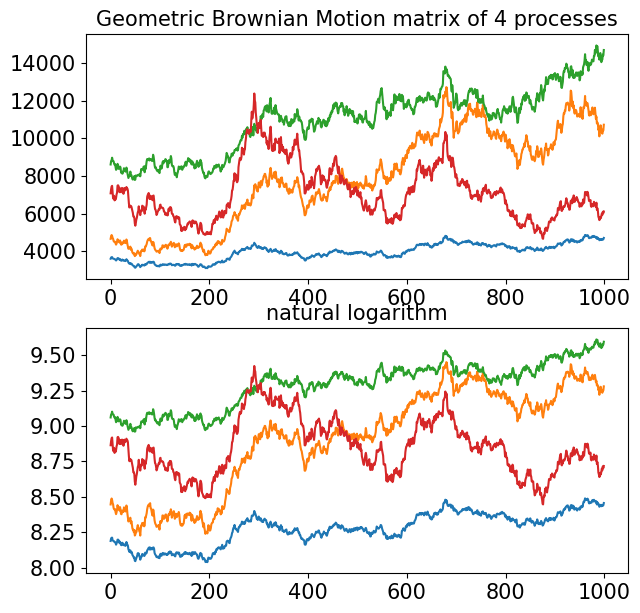

In [52]:
fig = plt.figure(figsize=(7, 7))


title = f"Geometric Brownian Motion matrix of {P_mat.shape[1]} processes"
plt.subplot(2, 1, 1)
plt.plot(P_mat)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

title = f"natural logarithm"
plt.subplot(2, 1, 2)
plt.plot(np.log(P_mat))
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [54]:
drift_constants = geometric_brownian.estimate_drift_constants(P_mat)

sigma_constants = geometric_brownian.estimate_sigma_constants(P_mat)
print(drift_constants, sigma_constants)

(0.000318982531117045, 0.0010379695948154748, 0.0006464891636926823, 0.00015786915425884104) (0.010090732016758822, 0.020171441054616338, 0.014923768854457174, 0.02468221168482975)


In [56]:
rho_estimated = geometric_brownian.estimate_gBrownian_correlation(P_mat)
rho_estimated

0.7175560356742289

In [58]:
df_P = pd.DataFrame(gen_geo_brownian.get_P(random_state=6))

#----------------------------------------------------------------

# sample size for gen geo Brownian simulation
N = 1_000

# estimate constant drift
mu_constants = geometric_brownian.estimate_drift_constants(df_P.values)
# implementation of Drift protocol
constant_drift = geometric_brownian.ConstantDrift(N, mu_constants)

# estimate constant sigma
sigma_constants = geometric_brownian.estimate_sigma_constants(df_P.values)
# implementation of sigma Protocol
constant_sigma = geometric_brownian.ConstantSigma(N, sigma_constants)

# init P from data
data_init_P = geometric_brownian.DataInitP(df_P.values)

# estimate gen geo Brownian correlation
rho = geometric_brownian.estimate_gBrownian_correlation(df_P.values)

# generalized geometric Brownian motion with dependency injection
gen_geo_brownian = geometric_brownian.GenGeoBrownian(constant_drift, constant_sigma, data_init_P, rho=rho)

In [59]:
gen_geo_brownian.get_P(random_state=None)

array([[ 6386.71414928,  1108.24806237,  6611.81852864,  2964.75707413],
       [ 6240.18182366,  1091.93600428,  6558.50882341,  2988.57544259],
       [ 6202.76810586,  1081.33265797,  6437.12958184,  2973.53921833],
       ...,
       [10902.10926047,  1021.8675701 , 20483.68806201,  3305.74991514],
       [10821.04388945,  1033.6257222 , 20660.08718335,  3242.10729294],
       [10828.293456  ,  1070.90620193, 20435.62247629,  3245.52207893]])

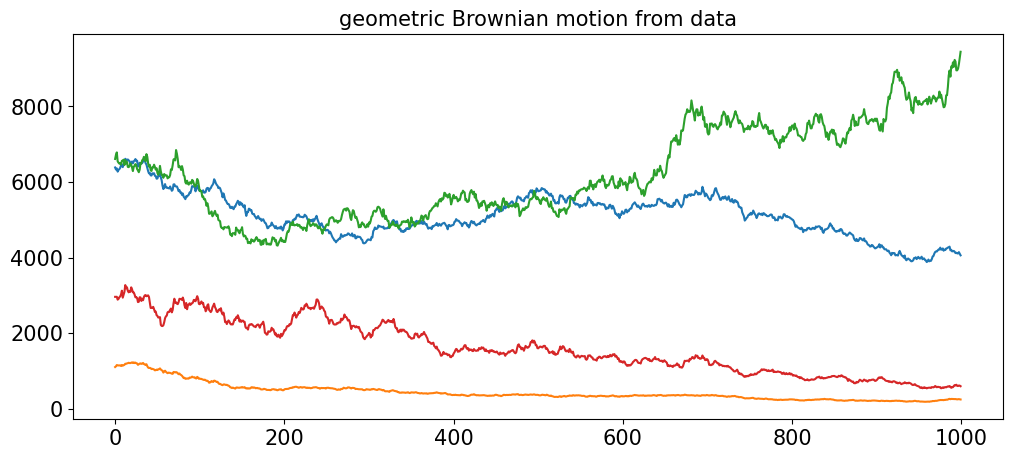

In [63]:
fig = plt.figure(figsize=(12, 5))

title = f"geometric Brownian motion from data"
plt.plot(gen_geo_brownian.get_P())
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [79]:
import gen_geo_brownian

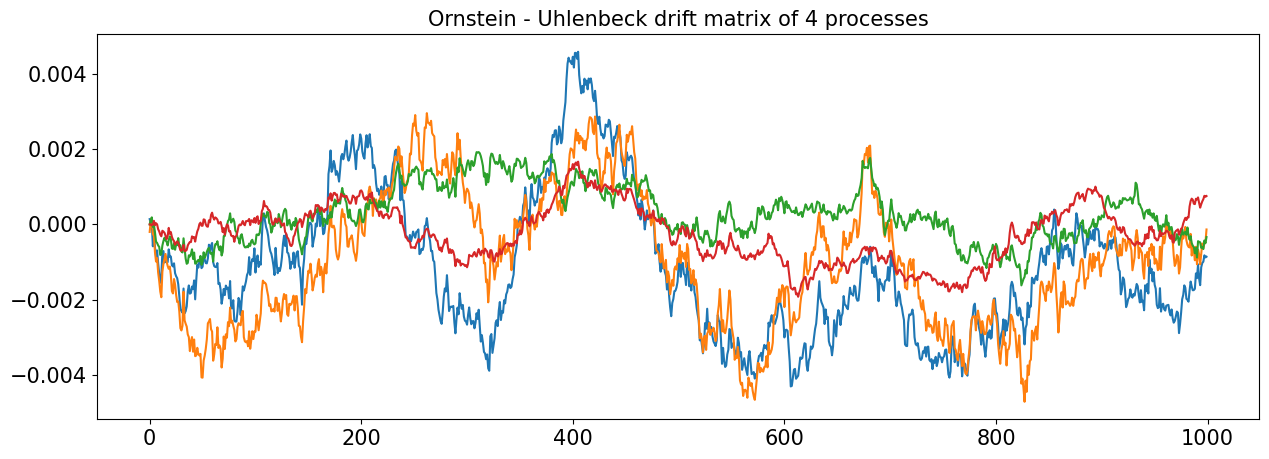

In [70]:
N = 1_000 # sample size 

OU_params = (
    OU_proc.OUParams(alpha=0.0097, gamma=0.00014, beta=0.00028),
    OU_proc.OUParams(alpha=0.008, gamma=-0.0002, beta=0.0003), 
    OU_proc.OUParams(alpha=0.013, gamma=0.0, beta=0.00015),
    OU_proc.OUParams(alpha=0.007, gamma=0.0, beta=0.0001),
)
rho = 0.7 # correation of processes 

# instance of protocol implementation
OU_drift = gen_geo_brownian.OUDrift(N, OU_params, rho=rho) 

# processes matrix
drift_mat = OU_drift.get_mu(random_state=2)


fig = plt.figure(figsize=(15, 5))

title = f"Ornstein - Uhlenbeck drift matrix of {len(OU_params)} processes"
plt.plot(drift_mat)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

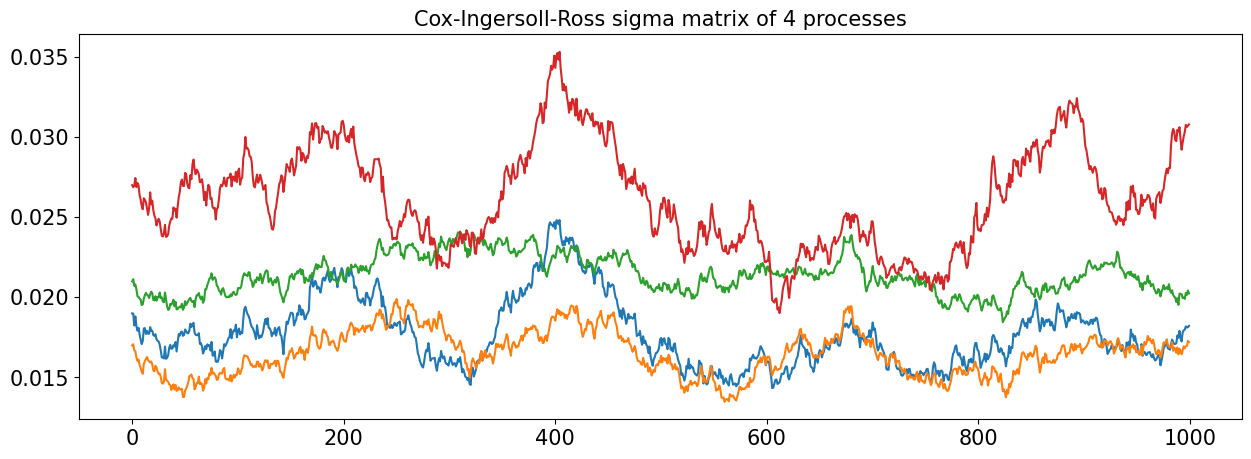

In [74]:
# different parameters for each process.

N = 1_000 # sample size 

CIR_params = (
    CIR_proc.CIRParams(a=0.012, b=0.019, c=0.0025),
    CIR_proc.CIRParams(a=0.013, b=0.017, c=0.0021), 
    CIR_proc.CIRParams(a=0.015, b=0.021, c=0.0017),
    CIR_proc.CIRParams(a=0.01, b=0.027, c=0.0029),
)
rho = 0.7 # correation of processes 

# instance of protocol implementation
CIR_sigma = gen_geo_brownian.CIRSigma(N, CIR_params, rho=rho)

# processes matrix
sigma_mat = CIR_sigma.get_sigma(random_state=2)


fig = plt.figure(figsize=(15, 5))

title = f"Cox-Ingersoll-Ross sigma matrix of {len(CIR_params)} processes"
plt.plot(sigma_mat)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [80]:
# OU drift instance
N = 1_000
OU_params = (
    OU_proc.OUParams(alpha=0.0097, gamma=0.00014, beta=0.00028),
    OU_proc.OUParams(alpha=0.008, gamma=-0.0002, beta=0.0003), 
    OU_proc.OUParams(alpha=0.013, gamma=0.0, beta=0.00015),
    OU_proc.OUParams(alpha=0.007, gamma=0.0, beta=0.0001),
)
OU_rho = 0.6

OU_drift = gen_geo_brownian.OUDrift(N, OU_params, rho=OU_rho)

# CIR sigma instance
N = 1_000
CIR_params = (
    CIR_proc.CIRParams(a=0.012, b=0.019, c=0.0025),
    CIR_proc.CIRParams(a=0.013, b=0.017, c=0.0021), 
    CIR_proc.CIRParams(a=0.015, b=0.021, c=0.0017),
    CIR_proc.CIRParams(a=0.01, b=0.027, c=0.0029),
)
CIR_rho = 0.7

CIR_sigma = gen_geo_brownian.CIRSigma(N, CIR_params, rho=CIR_rho)

# initP instance (random)
lower_bound = 3_000
upper_bound = 10_000
M = 4
random_init_P = geometric_brownian.RandomInitP(
    lower_bound, upper_bound, M
)

# generalized geometric Brownian motion with dependency injection
rho = 0.8
gen_geometric_brownian = geometric_brownian.GenGeoBrownian(
    OU_drift, CIR_sigma, random_init_P, rho=rho
)

# generate matix of P processes
P_mat = gen_geometric_brownian.get_P(random_state=6)

In [82]:
OU_drift_params = gen_geo_brownian.estimate_drift_OU_params(P_mat, rolling_window=100)

drift_correlation = gen_geo_brownian.estimate_drift_correlation(P_mat, rolling_window=100)
print(OU_drift_params)
print(drift_correlation)

(OUParams(alpha=0.0057047304352467335, gamma=-0.0008746304780980669, beta=0.0002565507181942365), OUParams(alpha=0.003546472130190069, gamma=-0.0020893385624472225, beta=0.00022420098338004187), OUParams(alpha=0.010934683584276687, gamma=0.00037207058913490466, beta=0.00029422302285511464), OUParams(alpha=0.010043841257882364, gamma=0.00029109530725183314, beta=0.0003780335445798264))
0.6721359055474915


In [84]:
CIR_sigma_params = gen_geo_brownian.estimate_sigma_CIR_params(P_mat, rolling_window=100)

sigma_correlation = gen_geo_brownian.estimate_sigma_correlation(P_mat, rolling_window=100)
print(CIR_sigma_params)
print(sigma_correlation)

(CIRParams(a=0.004305664604672421, b=0.017416218860410355, c=0.001417209089682895), CIRParams(a=0.005864459148049856, b=0.015461929490320101, c=0.0013414562911182421), CIRParams(a=0.005060707132195363, b=0.01949067229560286, c=0.0014391528320982815), CIRParams(a=0.004249622026166046, b=0.027811749667783863, c=0.001824134105553667))
0.5785954056182542


In [85]:
# simulate, random_state not None to reproduce results
gen_geometric_brownian.get_P(random_state=None)

array([[ 3589.38520974,  9432.74460121,  9854.17474493,  3787.53028819],
       [ 3602.01265811,  9443.93150376,  9770.68101588,  3700.85725261],
       [ 3493.07568479,  9136.55396257,  9455.36695175,  3628.23557809],
       ...,
       [ 2898.78055845,  8547.92953644, 13391.5477445 ,  4235.11995567],
       [ 2948.77442559,  8481.68705052, 13274.99750958,  4086.90567048],
       [ 2968.91883742,  8541.83684539, 13289.23579479,  4095.9115354 ]])

In [9]:
def semiOrderedPermutation(nums):
    smallest_number = min(nums)
    largest_number = max(nums)
    i=0
    steps_smallest = 0
    steps_largest = 0
    for num in nums:
        if num == smallest_number:
            steps_smallest = i
        if num == largest_number:
            steps_largest = len(nums) - i - 1
        i+=1
    if abs(steps_largest-steps_smallest)==1 or abs(steps_largest-steps_smallest)==0: return steps_smallest+steps_largest - 1
    return steps_smallest, steps_largest

In [10]:
semiOrderedPermutation([2,4,1,3])

3

In [13]:
[2,4,1,3].index(min([2,4,1,3]))
len([2,4,1,3]) - 2 + 

2